In [1]:
# 📦 Step 1: Upload and load dataset
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv('Sample - Superstore.csv', encoding='latin-1')
df.head()


Saving Sample - Superstore.csv to Sample - Superstore.csv


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [2]:
# 📊 Step 2: Create target variable
df['Profitable'] = (df['Profit'] > 0).astype(int)


In [3]:
# 🧹 Step 3: One-hot encode categorical features
df_encoded = pd.get_dummies(
    df,
    columns=['Category', 'Sub-Category', 'Segment', 'Region', 'Ship Mode'],
    drop_first=True
)


In [4]:
# 🛠 Step 4: Drop unnecessary columns
X = df_encoded.drop([
    'Profit', 'Profitable',
    'Row ID', 'Order ID', 'Order Date', 'Ship Date',
    'Customer ID', 'Customer Name', 'Country', 'City', 'State',
    'Postal Code', 'Product ID', 'Product Name'
], axis=1)

y = df_encoded['Profitable']


In [5]:
# 🎯 Step 5: Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# 🤖 Step 6: Train logistic regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [7]:
# 📈 Step 7: Evaluate model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9414707353676839
Confusion Matrix:
 [[ 291   86]
 [  31 1591]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.77      0.83       377
           1       0.95      0.98      0.96      1622

    accuracy                           0.94      1999
   macro avg       0.93      0.88      0.90      1999
weighted avg       0.94      0.94      0.94      1999



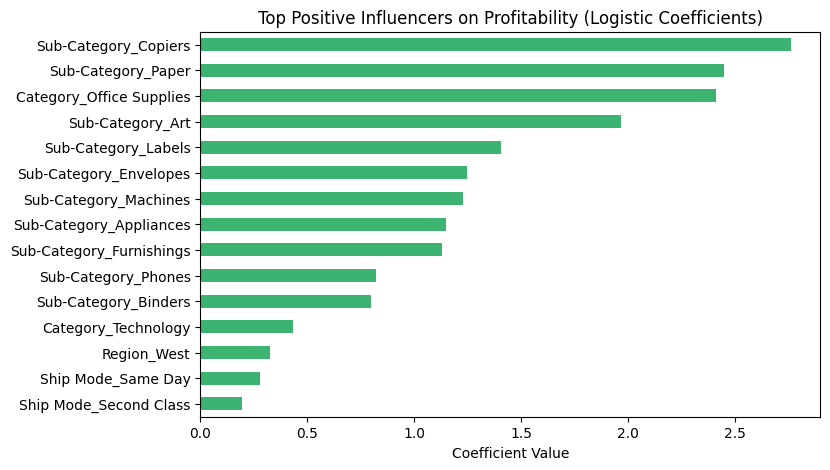

In [8]:
# 📊 Step 8: Feature importance plot (logistic coefficients)
import numpy as np
import matplotlib.pyplot as plt

coeffs = pd.Series(model.coef_[0], index=X_train.columns)
top_coeffs = coeffs.sort_values(ascending=False).head(15)

plt.figure(figsize=(8, 5))
top_coeffs.plot(kind='barh', color='mediumseagreen')
plt.title("Top Positive Influencers on Profitability (Logistic Coefficients)")
plt.xlabel("Coefficient Value")
plt.gca().invert_yaxis()
plt.show()
